# Analyzing the StackOverflow developer survey dataset 

In [110]:
import pandas as pd 
import numpy as np
import seaborn as sbn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data = pd.read_csv('survey_results_public.csv')
data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [57]:
data_u = pd.read_csv('survey_results_schema.csv')
data_u

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [58]:
selected_columns = [
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [59]:
data_final = data[selected_columns].copy()

In [60]:
data_final

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaninng

In [61]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [62]:
data_final.Age1stCode

0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object

In [63]:
data_final.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [64]:
data_final.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [65]:
data_final.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [66]:
data_final['Age1stCode'] = pd.to_numeric(data_final.Age1stCode, errors='coerce')

In [67]:
data_final['YearsCode'] = pd.to_numeric(data_final.YearsCode, errors='coerce')

In [68]:
data_final['YearsCodePro'] = pd.to_numeric(data_final.YearsCodePro, errors='coerce')

In [69]:
data_final.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [70]:
data_final.drop(data_final[data_final.Age < 10].index, inplace = True)
data_final.drop(data_final[data_final.Age > 90].index, inplace = True)

In [71]:
data_final.drop(data_final[data_final.WorkWeekHrs > 105].index, inplace = True)

In [72]:
data_final.drop(data_final[data_final.Age1stCode > 60].index, inplace = True)

In [73]:
data_u

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [74]:
data_u.Column.unique()

array(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode',
       'CompFreq', 'CompTotal', 'ConvertedComp', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment',
       'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith',
       'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood',
       'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch',
       'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat',
       'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq',
       'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor',
       'WebframeDesir

In [75]:
data_final['Gender'].value_counts()

Man                                                            45857
Woman                                                           3832
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

In [76]:
data_final.where(~(data_final.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [77]:
data_final['Gender'].value_counts()

Man                                                  45857
Woman                                                 3832
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

In [78]:
data_final.sample(20)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
11992,Germany,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,8.0,7.0,NaN,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Once a year,Play games;Visit Stack Overflow;Watch help / t...,"Independent contractor, freelancer, or self-em...",Data or business analyst;Data scientist or mac...,NaN,NaN,NaN,NaN,Very important
39002,France,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,VBA,C++,NaN,Do other work and come back later;Visit anothe...,Retired,NaN,NaN,NaN,NaN,NaN,NaN
16528,Nigeria,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,9.0,20.0,NaN,Assembly;C;C#;C++;Dart;HTML/CSS;Java;JavaScrip...,Dart;Go;Haskell;HTML/CSS;JavaScript;Julia;Kotl...,Once every few years,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,Remote work options;Office environment or comp...,NaN,NaN
45668,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,28.0,6.0,NaN,JavaScript,JavaScript,Every few months,Visit Stack Overflow,Employed full-time,Educator,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
28588,Israel,25.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,7.0,4.0,Python,Go;Python,Once every few years,Visit Stack Overflow,Employed full-time,NaN,50.0,Slightly satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Very important
59012,Switzerland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;SQL;TypeScript,Assembly;Go;Scala,Every few months,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
43466,Germany,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,No,10.0,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",Designer;System administrator,NaN,NaN,How widely used or impactful my work output wo...,NaN,Somewhat important
13557,Germany,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,16.0,12.0,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;Java;Kotlin;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
45448,Brazil,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed part-time,NaN,NaN,NaN,NaN,NaN,NaN
15954,India,19.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,18.0,3.0,NaN,C;HTML/CSS;JavaScript;Python,C;Go;Java;JavaScript;Kotlin;Objective-C;Python...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Industry that I’d be working in;Remote work op...,NaN,NaN


# Exploratory Analysis and Visualization

In [79]:
data_final.Country.value_counts()

United States                         12367
India                                  8351
United Kingdom                         3877
Germany                                3864
Canada                                 2172
                                      ...  
Liechtenstein                             1
Kiribati                                  1
Micronesia, Federated States of...        1
Fiji                                      1
Chad                                      1
Name: Country, Length: 183, dtype: int64

In [80]:
top_countries = data_final.Country.value_counts().head(15)
top_countries

United States         12367
India                  8351
United Kingdom         3877
Germany                3864
Canada                 2172
France                 1884
Brazil                 1804
Netherlands            1330
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1114
Russian Federation     1083
Sweden                  878
Pakistan                801
Name: Country, dtype: int64

In [81]:
sbn.set_style("darkgrid")

## StackOverflow users from different countries

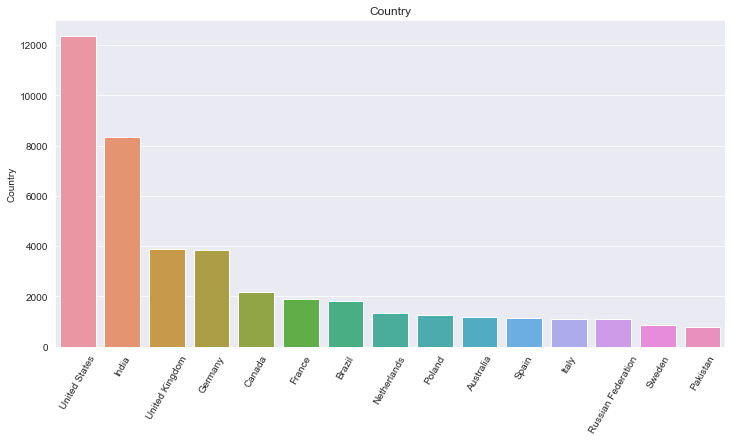

In [82]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 60)
plt.title('Country')
sbn.barplot(x = top_countries.index, y = top_countries);

### No. of respondents from different age groups

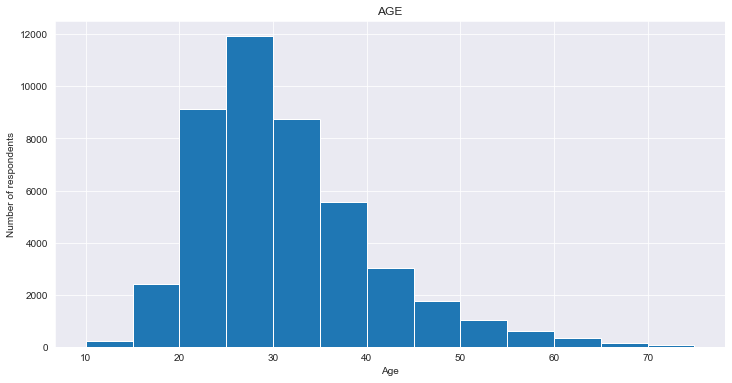

In [83]:
plt.figure(figsize = (12,6))
plt.title('AGE')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(data_final.Age, bins = np.arange(10,80,5));

## Users vs Gender

In [84]:
gender_counts = data_final.Gender.value_counts()
gender_counts

Man                                                  45857
Woman                                                 3832
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x10e5b640>,
 [Text(1.061774986388599, -0.28746109002696435, 'Man'),
  Text(-1.054580888563178, 0.3128244707136863, 'Woman'),
  Text(-1.0996840643957597, 0.026362065814775598, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791499925755994, -0.15679695819652598, '91.6%'),
  Text(-0.5752259392162788, 0.17063152948019253, '7.7%'),
  Text(-0.5998276714885962, 0.014379308626241233, '0.8%')])

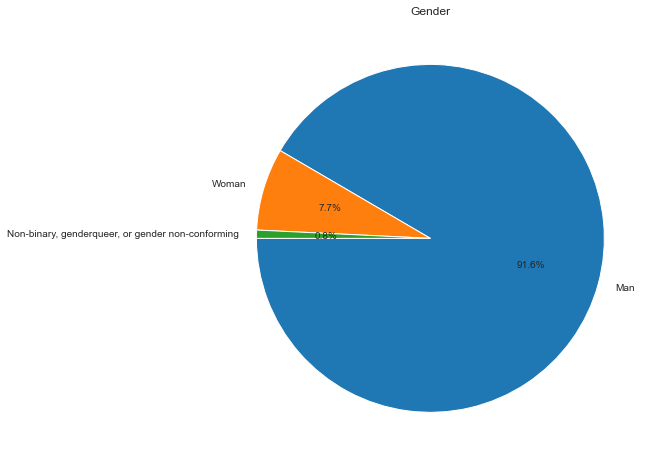

In [85]:
plt.figure(figsize = (15,8))
plt.title('Gender')
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=180)

## Highest Education Level

Text(0.5, 1.0, 'Highest Education Level')

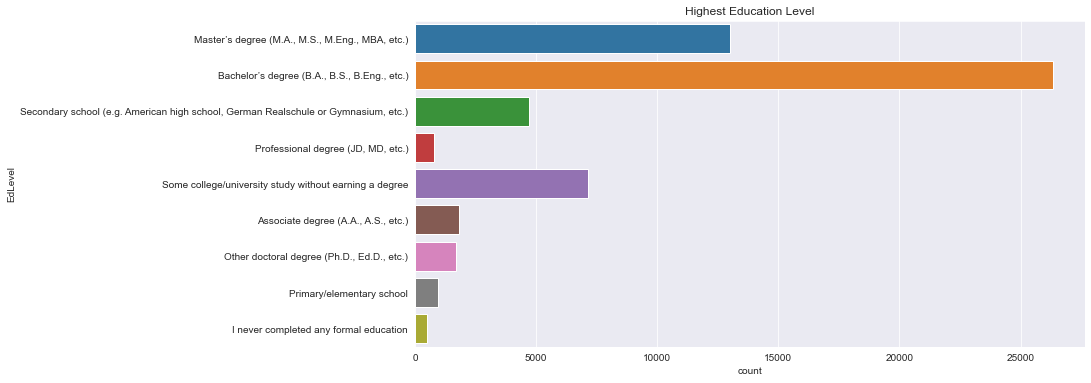

In [86]:
plt.figure(figsize = (12,6))
sbn.countplot(y = data_final.EdLevel)
plt.title("Highest Education Level")

## Undergraduate Degree

In [87]:
data_final.UndergradMajor.count()

50571

In [88]:
undergrad_pct = data_final.UndergradMajor.value_counts()*100 / data_final.UndergradMajor.count()
undergrad_pct

Computer science, computer engineering, or software engineering                   61.942615
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.353187
Information systems, information technology, or system administration              7.986791
A natural science (such as biology, chemistry, physics, etc.)                      4.316703
Mathematics or statistics                                                          3.626584
Web development or web design                                                      3.498052
A business discipline (such as accounting, finance, marketing, etc.)               2.699175
A humanities discipline (such as literature, history, philosophy, etc.)            1.971486
A social science (such as anthropology, psychology, political science, etc.)       1.823179
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.411876
I never declared a major                                                        

Text(0.5, 0, 'percentage')

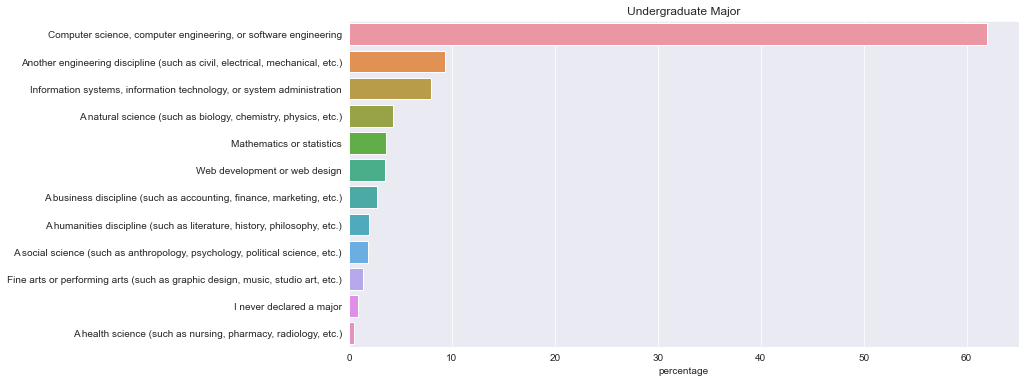

In [89]:
plt.figure(figsize = (12,6))
sbn.barplot(x = undergrad_pct, y = undergrad_pct.index)
plt.title("Undergraduate Major")
plt.xlabel("percentage")

## Emplyment Status

In [90]:
data_final.Employment.value_counts()

Employed full-time                                      44932
Student                                                  7730
Independent contractor, freelancer, or self-employed     5605
Not employed, but looking for work                       2321
Employed part-time                                       2195
Not employed, and not looking for work                    318
Retired                                                   234
Name: Employment, dtype: int64

In [91]:
data_final.UndergradMajor

0        Computer science, computer engineering, or sof...
1        Computer science, computer engineering, or sof...
2                                                      NaN
3        Computer science, computer engineering, or sof...
4        Computer science, computer engineering, or sof...
                               ...                        
64456    Computer science, computer engineering, or sof...
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460    Computer science, computer engineering, or sof...
Name: UndergradMajor, Length: 64245, dtype: object

In [92]:
data_final.Employment.count()

63335

In [93]:
employment_pct = data_final.Employment.value_counts()*100 / data_final.Employment.count()
employment_pct

Employed full-time                                      70.943396
Student                                                 12.204942
Independent contractor, freelancer, or self-employed     8.849767
Not employed, but looking for work                       3.664640
Employed part-time                                       3.465698
Not employed, and not looking for work                   0.502092
Retired                                                  0.369464
Name: Employment, dtype: float64

Text(0.5, 0, 'percentage')

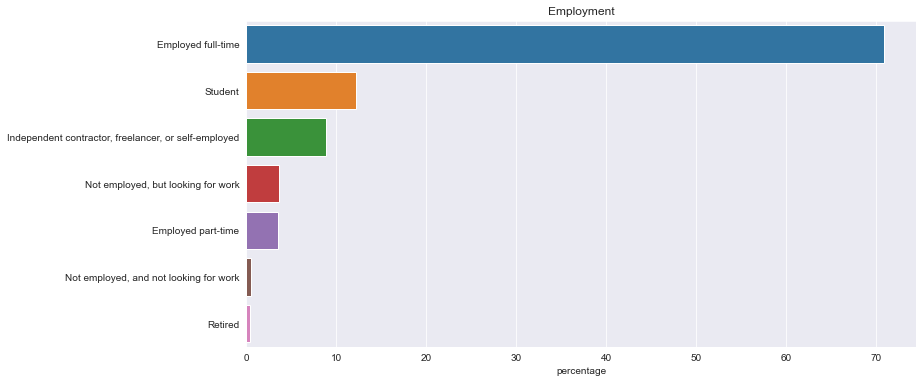

In [94]:
plt.figure(figsize = (12,6))
sbn.barplot(x = employment_pct, y = employment_pct.index)
plt.title("Employment")
plt.xlabel("percentage")

In [95]:
data_final.DevType.value_counts()

Developer, full-stack                                                                                                                                                                              4394
Developer, back-end                                                                                                                                                                                3052
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                     2214
Developer, back-end;Developer, full-stack                                                                                                                                                          1464
Developer, front-end                                                                                                                                                                               1389


In [96]:
data_final.DevType.to_frame()


,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [97]:
data_final.DevType.notnull()

0         True
1         True
2        False
3        False
4        False
         ...  
64456     True
64457    False
64458    False
64459    False
64460    False
Name: DevType, Length: 64245, dtype: bool

In [98]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

In [99]:
dev_type = split_multicolumn(data_final.DevType)
dev_type

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
dev_type_totals = dev_type.sum()
dev_type_totals

Developer, desktop or enterprise applications    11671
Developer, full-stack                            26891
Developer, mobile                                 9388
Designer                                          5249
Developer, front-end                             18106
Developer, back-end                              26966
Developer, QA or test                             3885
DevOps specialist                                 5906
Developer, game or graphics                       2746
Database administrator                            5648
Developer, embedded applications or devices       4692
Engineer, data                                    3691
Educator                                          2890
System administrator                              5174
Engineering manager                               2694
Product manager                                   2463
Data or business analyst                          3963
Academic researcher                               3494
Data scien

In [101]:
dev_type_totals.sum()

155330

In [102]:
devtype_pct = dev_type_totals*100 / dev_type_totals.sum()
devtype_pct

Developer, desktop or enterprise applications     7.513681
Developer, full-stack                            17.312174
Developer, mobile                                 6.043907
Designer                                          3.379257
Developer, front-end                             11.656473
Developer, back-end                              17.360458
Developer, QA or test                             2.501127
DevOps specialist                                 3.802228
Developer, game or graphics                       1.767849
Database administrator                            3.636130
Developer, embedded applications or devices       3.020666
Engineer, data                                    2.376231
Educator                                          1.860555
System administrator                              3.330973
Engineering manager                               1.734372
Product manager                                   1.585656
Data or business analyst                          2.5513

Text(0.5, 0, 'percentage')

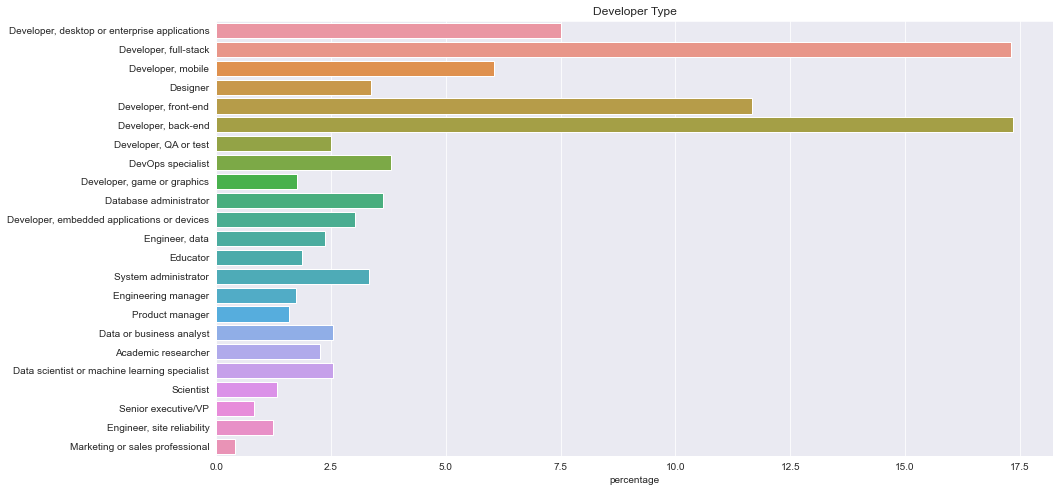

In [103]:
plt.figure(figsize = (15,8))
sbn.barplot(x = devtype_pct, y = devtype_pct.index)
plt.title("Developer Type")
plt.xlabel("percentage")

In [104]:
data_final.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64245, dtype: object

In [105]:
lang_used = split_multicolumn(data_final.LanguageWorkedWith)
lang_used

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
lang_used_totals = lang_used.sum()
lang_used_totals

C#                       17860
HTML/CSS                 35852
JavaScript               38481
Swift                     3354
Objective-C               2311
Python                   25056
Ruby                      3998
SQL                      31126
Java                     22883
PHP                      14852
C                        12352
TypeScript               14426
Bash/Shell/PowerShell    18788
Kotlin                    4421
R                         3251
VBA                       3457
Perl                      1767
Scala                     2021
C++                      13561
Go                        4983
Haskell                   1193
Rust                      2887
Dart                      2251
Julia                      499
Assembly                  3491
dtype: int64

In [107]:
lang_used_pct = lang_used_totals*100 / lang_used_totals.sum()
lang_used_pct

C#                        6.264007
HTML/CSS                 12.574311
JavaScript               13.496375
Swift                     1.176343
Objective-C               0.810533
Python                    8.787848
Ruby                      1.402212
SQL                      10.916769
Java                      8.025715
PHP                       5.209017
C                         4.332196
TypeScript                5.059606
Bash/Shell/PowerShell     6.589483
Kotlin                    1.550570
R                         1.140218
VBA                       1.212468
Perl                      0.619737
Scala                     0.708822
C++                       4.756226
Go                        1.747679
Haskell                   0.418419
Rust                      1.012553
Dart                      0.789489
Julia                     0.175013
Assembly                  1.224392
dtype: float64

Text(0.5, 0, 'percentage')

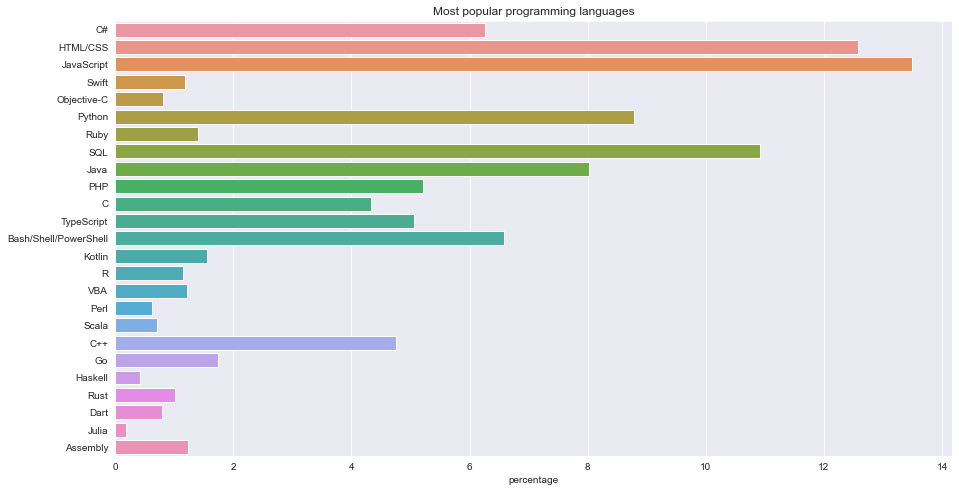

In [111]:
plt.figure(figsize = (15,8))
sbn.barplot(x = lang_used_pct, y = lang_used_pct.index)
plt.title("Most popular programming languages")
plt.xlabel("percentage")

# Conclusions:

1- High number of respondents of the survey are from the US and India. Survey clearly doesn't represent the whole programming community (fig.1)






2- Large number of respondents of the survey belong to 20-45 age group. (fig.2)

3- Only about 8% of the survey repondents identify as women or non-binary. (fig.3)

4- Almost half of the repondents atleast hold a bachelor or masters degree. (fig.4)

5- 60% of programmers hold a college degree in computer science. 40% are from a field of study other than computer science, which is encouraging. (fig.5)

6- Almost 85% of users are employed or students and almost 15% are working as a freelancer or part time or doing it as a hobby. (fig.6)

7- Almost 70% of the respondents have developer in their job titles. (fig.7)

8- Javascript, HTML/CSS, SQL, Python and Java are 5 most used programming languages and web development skills (more than 55% of respondents use them). (fig.8) 

...

### Refrences:

1- Data analysis with python course, jovian.ai youtube videos. 

2- Corey Schafer, Keith Galli, Freecodecamp youtube videos and lots of google searches.